# 4.0 Data and Feature Validation (Trial 1)

### Required Modules

In [42]:
# Basic Operations
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

### Data Set Up

In [54]:
# Original Data
raw_data = pd.read_csv("data/training-set-1/pose_data_raw.csv")

raw_data['label'] = raw_data['pose_name'].str.replace('-lft', '').str.replace('-rgt', '')
labels, uniques = pd.factorize(raw_data['label'])
raw_data['label_encoded'] = labels

X = raw_data.iloc[:,2:134]
y = raw_data['label_encoded'].values

## 4.1 Cross Validation of Data Augmentation


<Axes: >

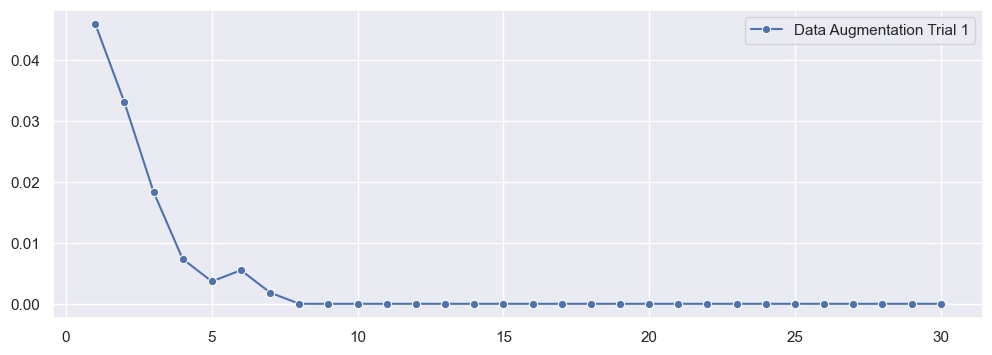

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = [i for i in range(1, 31)]

scores_v1 = []
scores_v2 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score_v1 = cross_val_score(knn, X_scaled, y, cv=LeaveOneOut(), scoring='accuracy')
    scores_v1.append(np.mean(score_v1))

sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = scores_v1, marker = 'o', label='Data Augmentation Trial 1')

## 4.2 Principal Component Analysis and KNN

### Processed data with added features

In [36]:
processed_data = pd.read_csv("data/training-set-1/pose_data_res.csv")
processed_data

,image_filename,pose_name,landmark_00_x,landmark_00_y,landmark_00_z,landmark_00_v,landmark_01_x,landmark_01_y,landmark_01_z,landmark_01_v,...,d_elbows,d_knees,d_ankles,a_nose_to_rgt_shoulder,a_nose_to_lft_shoulder,a_mid_hip_to_knees,a_rgt_shoulder_to_wrist,a_rgt_hip_to_ankle,a_lft_shoulder_to_wrist,a_lft_hip_to_ankle
0,advanced-figurehead-lft.png,advanced-figurehead-lft,0.545408,0.259078,-0.407526,0.998032,0.529543,0.271390,-0.377108,0.997484,...,0.0334,0.0267,0.0124,-10.7029,122.8088,-0.6969,-291.3413,-98.4931,-276.8157,-102.7408
1,advanced-figurehead-rgt.png,advanced-figurehead-rgt,0.436167,0.272993,0.042864,0.994189,0.451747,0.284805,0.008824,0.993863,...,0.0344,0.0293,0.0152,172.2824,73.3363,2.4429,-80.3719,107.3156,-70.6368,96.1283
2,aerial-leg-hold-crucifix-lft.png,aerial-leg-hold-crucifix-lft,0.504749,0.180154,-0.839282,0.999996,0.512618,0.166645,-0.803643,0.999990,...,0.4055,0.0507,0.0373,-91.0384,83.7577,-17.6799,187.0179,154.8557,169.2824,174.2972
3,aerial-leg-hold-crucifix-rgt.png,aerial-leg-hold-crucifix-rgt,0.499891,0.180474,-0.591090,0.999997,0.509142,0.168015,-0.550916,0.999988,...,0.3955,0.0582,0.0382,268.8661,95.2205,-19.8225,-174.3876,179.9717,170.7356,202.3521
4,air-walk-lft.png,air-walk-lft,0.450799,0.341594,-0.282800,0.999512,0.444959,0.327051,-0.349440,0.999634,...,0.2875,0.1259,0.2688,129.7358,39.2439,-48.0087,-176.6000,180.4206,156.8697,170.3318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,wrist-sit-rgt.png,wrist-sit-rgt,0.506111,0.534306,-0.154565,0.999970,0.509519,0.520750,-0.135237,0.999945,...,0.2341,0.4005,0.7233,245.8490,124.9920,122.2358,116.8475,-185.4802,-185.5553,-178.7115
540,yogini-lft.png,yogini-lft,0.750999,0.265975,0.050217,1.000000,0.734617,0.252835,0.082880,1.000000,...,0.0377,0.0409,0.0833,30.6862,-128.5624,-7.5683,186.1655,-70.8528,187.0363,-81.5335
541,yogini-rgt.png,yogini-rgt,0.254569,0.253966,0.185102,0.999985,0.276668,0.244936,0.168699,0.999988,...,0.0300,0.0258,0.0578,163.7814,278.3243,-4.8821,168.7918,80.8230,173.0351,74.3108
542,yogini-twisted-lft.png,yogini-twisted-lft,0.356109,0.269642,-0.166786,0.999335,0.358961,0.250586,-0.201648,0.998349,...,0.1726,0.3890,0.5624,284.0931,229.4100,-138.9177,229.7118,121.3195,-182.1522,66.5343


### PCA and KNN Pipeline

/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_28169/2361053346.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('hsv', num_classes)


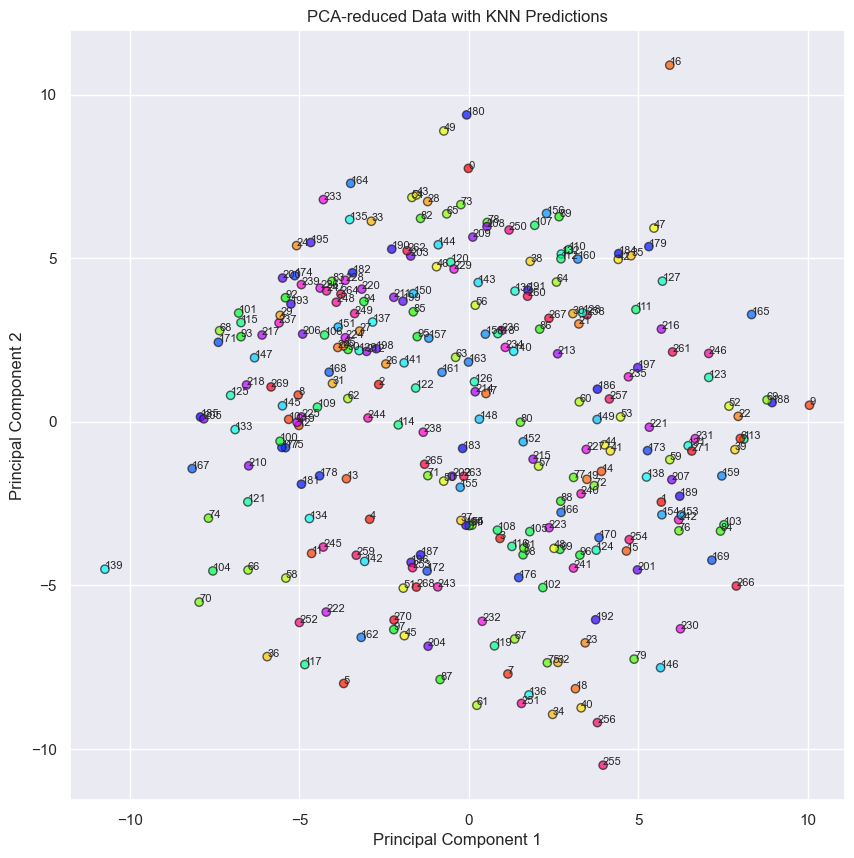

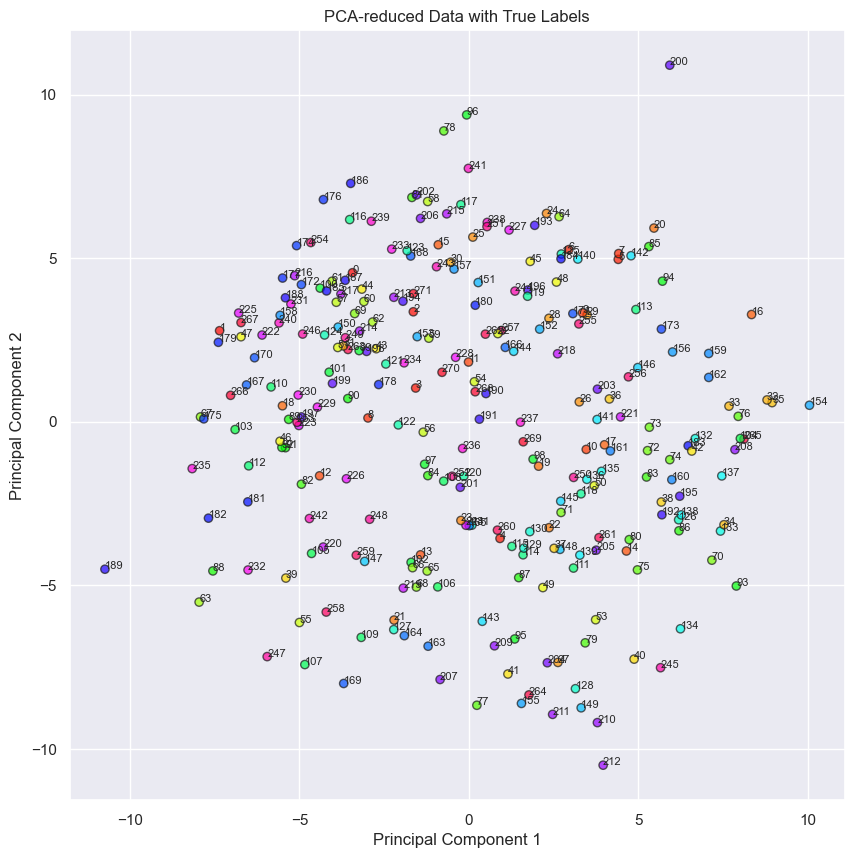

/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_28169/2361053346.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', marker='x', edgecolor='k', alpha=0.7, label='Incorrect')


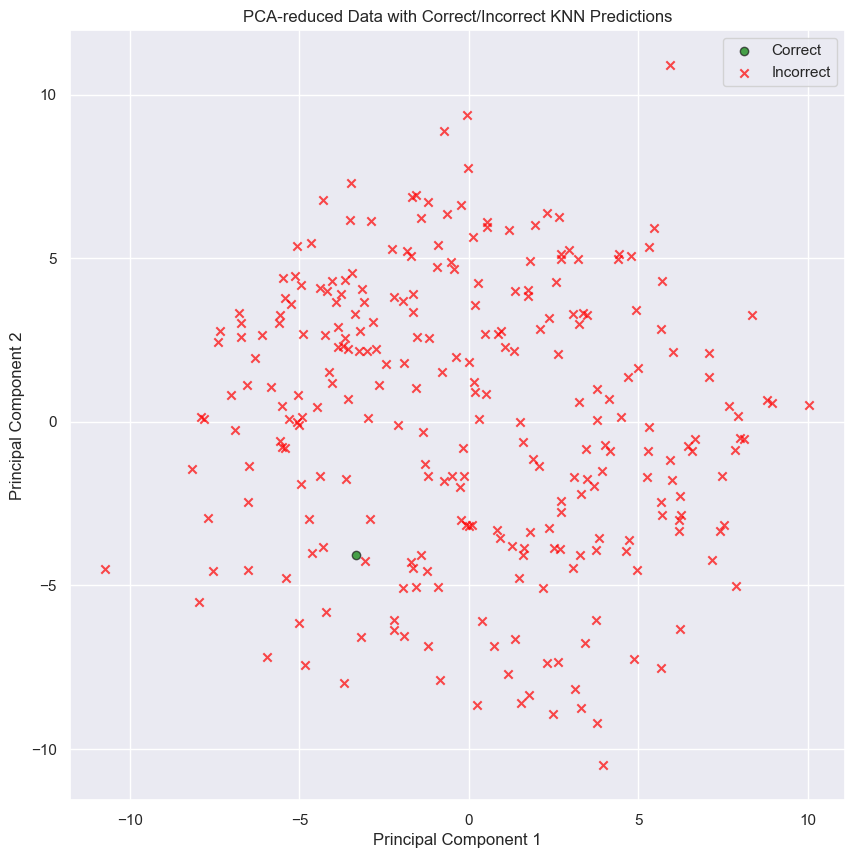

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.5, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = KNeighborsClassifier(n_neighbors=11, weights='distance')
model.fit(X_test_pca, y_train)

y_pred = model.predict(X_test_pca)

num_classes = len(np.unique(y))
colormap = cm.get_cmap('hsv', num_classes)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap=colormap, edgecolor='k', alpha=0.7)
for i, txt in enumerate(y_pred):
    plt.annotate(txt, (X_test_pca[i, 0], X_test_pca[i, 1]), fontsize=8)

plt.title('PCA-reduced Data with KNN Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# True Labels
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=colormap, edgecolor='k', alpha=0.7)
for i, txt in enumerate(y_test):
    plt.annotate(txt, (X_test_pca[i, 0], X_test_pca[i, 1]), fontsize=8)
plt.title('PCA-reduced Data with True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Predictions
plt.figure(figsize=(10, 10))
correct = y_pred == y_test
plt.scatter(X_test_pca[correct, 0], X_test_pca[correct, 1], c='green', marker='o', edgecolor='k', alpha=0.7, label='Correct')
incorrect = ~correct
plt.scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', marker='x', edgecolor='k', alpha=0.7, label='Incorrect')
plt.title('PCA-reduced Data with Correct/Incorrect KNN Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Trial 1 Findings

Due to the current limitation of having only two samples for each of the 272 classes, the accuracy of the model is insufficient for conducting reliable further analysis. In order to validate the features effectively and improve the model's performance, it is imperative to augment the dataset. The implementation of synthetic data generation techniques is recommended to increase the volume of data per class. Additionally, conducting feature importance experiments will be beneficial in evaluating the impact of newly added features on the model's accuracy. This approach will not only help in enhancing the model's performance but also provide deeper insights into the relevance and contribution of each feature towards the classification task.